# Лабораторная работа 6. Выбор оптимального классификатора

В этой лабораторной работе вам потребуется выбрать наилучший классификатор с оптимальными параметрами для задачи про пассажиров ["Титаника"](https://ru.wikipedia.org/wiki/Титаник).

__Задание 1.__  
Загрузите данные (см. предыдущую лабораторную работу).

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

train = pd.read_csv("train.csv") # lab5_input
test = pd.read_csv("test.csv") # lab5_input
print(train.value_counts("SibSp"), train.shape)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64 (891, 12)


__Задание 2.__  
Проведите предобработку данных (см. предыдущую лабораторную работу).

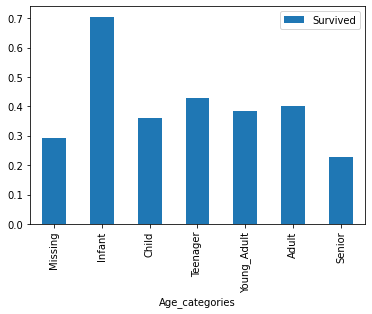

In [105]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].replace(np.NaN, -0.5) #fillna
    df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young_Adult", "Adult", "Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [106]:
def create_dummies(df, column_name):
    dum = pd.get_dummies(df[column_name], prefix=[column_name])
    df = pd.concat([df,dum],axis=1)
    return df

train = create_dummies(train, "Pclass")
test = create_dummies(test, "Pclass")

train = create_dummies(train, "Sex")
test = create_dummies(test, "Sex")

train = create_dummies(train, "Age_categories")
test = create_dummies(test, "Age_categories")

train = create_dummies(train, "Embarked")
test = create_dummies(test, "Embarked")

__Задание 3.__  
Примените масштабирование признаков (`StandardScaler`, `MinMaxScaler`).

In [107]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
drop_cols = ['Name', 'Sex', 'PassengerId', 'Age', 'Age_categories', 'Ticket', 'Cabin', 'Embarked', 'Pclass']
train = train.drop(columns=drop_cols, axis=1)
test = test.drop(columns=drop_cols, axis=1)
#print(train[train.isnull().any(axis=1)])

features = ['Parch', 'SibSp', 'Fare']
train[features]= StandardScaler().fit_transform(train[features])
test[features]= StandardScaler().fit_transform(test[features])

__Задание 4.__  
Примените различные преобразования признаков (`PolynomialFeatures`).

In [108]:
# Ваш код здесь
print(train)

     Survived     SibSp  ...  ['Embarked']_Q  ['Embarked']_S
0           0  0.432793  ...               0               1
1           1  0.432793  ...               0               0
2           1 -0.474545  ...               0               1
3           1  0.432793  ...               0               1
4           0 -0.474545  ...               0               1
..        ...       ...  ...             ...             ...
886         0 -0.474545  ...               0               1
887         1 -0.474545  ...               0               1
888         0  0.432793  ...               0               1
889         1 -0.474545  ...               0               0
890         0 -0.474545  ...               1               0

[891 rows x 19 columns]


__Задание 5.__  
Обучите несколько классификаторов, в том числе:  
1. Логистическую регрессию (`LogisticRegression`).
1. Метод опорных векторов (`SVC`).
1. Метод *k* ближайших соседей (`KNeighborsClassifier`).
1. Наивный байесовский классификатор (`MultinomialNB`).
1. Деревья решений (`DecisionTreeClassifier`).
1. Случайный лес (`RandomForestClassifier`).
1. AdaBoost (`AdaBoost`).
1. Градиентный бустинг (`GradientBoostingClassifier`).

Для обучения и проверки качества можно использовать функцию `train_test_split()`.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [110]:
y = train['Survived']
df = train.copy()

x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(712, 19) (179, 19) (712,) (179,)


In [111]:
# Логистическая регрессия
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)
print(lr.score(x_test, y_test))

1.0


In [112]:
# Метод опорных векторов (SVC)
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(svc.score(x_test, y_test))

0.994413407821229


In [113]:
# Метод k ближайших соседей (KNeighborsClassifier)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test, y_test))

0.9441340782122905


In [114]:
# Наивный байесовский классификатор (MultinomialNB)
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
print(gaussian.score(x_test, y_test))

1.0


In [115]:
# Деревья решений (DecisionTreeClassifier)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(decision_tree.score(x_test, y_test))

1.0


In [116]:
# Случайный лес (RandomForestClassifier)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(random_forest.score(x_test, y_test))

1.0


In [117]:
# AdaBoost (AdaBoost)
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print(ada.score(x_test, y_test))

1.0


In [118]:
# Градиентный бустинг (GradientBoostingClassifier)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
print(gbc.score(x_test, y_test))

1.0


__Задание 6.__  
При помощи `Pipeline` и `GridSearchCV` выберите оптимальную архитектуру:
1. Метод масштабирования.
1. Степень полинома в `PolynomialFeatures`.
1. Параметры классификаторов (в том числе, параметры регуляризации).

Заносите в таблицу Excel результаты тестирования (варианты параметров, оценки качества).

__Задание 7.__  
1. Выберите несколько лучших классификаторов (от 3 до 10).
1. Обучите выбранные классификаторы на всех доступных размеченных данных.
1. Получите результаты предсказания для тестовых данных.
1. Отправьте результаты на сервер [Kaggle](https://ru.wikipedia.org/wiki/Титаник).

In [119]:
# Ваш код здесь